## Summary

This notebook aims to
1. import 5 groups of images (1 - clear, 2 - out-of-focus, 3 - gaussin blur, 4 - motion blur, 5-minfilter blur)
2. convert into matrices
3. save as arrays (to be fed into CNN model)

### Import packages

In [1]:
%run '1_import_packages_functions.ipynb'

/Users/MingTang/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.
/Users/MingTang/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### Load data (5 classes)

In [2]:
folder_path_1 = '/Users/MingTang/Documents/Data_Science/01_Project/05_Image_CNN/datasets/0_clear_4195'
folder_path_2 = '/Users/MingTang/Documents/Data_Science/01_Project/05_Image_CNN/datasets/5_out_of_focus_704'
folder_path_3 = '/Users/MingTang/Documents/Data_Science/01_Project/05_Image_CNN/datasets/2_blurry_artificial_gaussian_radius-20_1000'
folder_path_4 = '/Users/MingTang/Documents/Data_Science/01_Project/05_Image_CNN/datasets/3_blurry_artificial_motion_size-150_1000'
folder_path_5 = '/Users/MingTang/Documents/Data_Science/01_Project/05_Image_CNN/datasets/4_blurry_artificial_MinFilter-7_1000'

labels = 5

folder_path_list = [folder_path_1, folder_path_2, folder_path_3, folder_path_4, folder_path_5]

label_list = [0,1,2,3,4,5,6,7,8,9]

print('Summary of data:')
for i in range(0, labels):
    print('  --  Folder', i,' --- total images: ', len(os.listdir(folder_path_list[i])), ' --- label/ID: ', label_list[i], ' -- folder name:', str(folder_path_list[i]).split('/')[-1],)
    
print('\nStart to load data ...')
X_1 = []; X_2 = []; X_3 = []; X_4 = []; X_5 = []; X_6 = [];
y_1 = []; y_2 = []; y_3 = []; y_4 = []; y_5 = []; y_6 = [];
X_list = [X_1, X_2, X_3, X_4, X_5, X_6]
y_list = [y_1, y_2, y_3, y_4, y_5, y_6]

X, y = image_to_array(folder_path_list[0], label_list[0], 1000)

for i in range(1, labels):
    print('Stage:', i,'/', labels-1,'\n---')
    X_list[i], y_list[i] = image_to_array(folder_path_list[i], label_list[i], 1000)
    X = np.concatenate((X, X_list[i]),axis=0)  
    y = np.concatenate((y, y_list[i]),axis=0) 

print('\nData collection is done!')

Summary of data:
  --  Folder 0  --- total images:  4195  --- label/ID:  0  -- folder name: 0_clear_4195
  --  Folder 1  --- total images:  705  --- label/ID:  1  -- folder name: 5_out_of_focus_704
  --  Folder 2  --- total images:  1001  --- label/ID:  2  -- folder name: 2_blurry_artificial_gaussian_radius-20_1000
  --  Folder 3  --- total images:  1000  --- label/ID:  3  -- folder name: 3_blurry_artificial_motion_size-150_1000
  --  Folder 4  --- total images:  1000  --- label/ID:  4  -- folder name: 4_blurry_artificial_MinFilter-7_1000

Start to load data ...
Adjusted image size - (200, 200) | filename - 100_1822.jpg
Adjusted image size - (200, 200) | filename - 100_1830.jpg
Adjusted image size - (200, 200) | filename - 100_2080.JPG
100 images loaded so far
200 images loaded so far
300 images loaded so far
400 images loaded so far
500 images loaded so far
600 images loaded so far
700 images loaded so far
800 images loaded so far
900 images loaded so far
---
 1000 images in this fold

### Check images from the folder

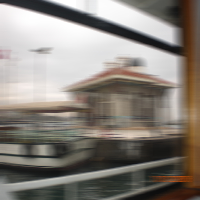

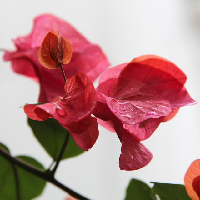

In [4]:
image_index = 20
check_image_from_folder(folder_path_4,image_index)
check_image_from_folder(folder_path_2, image_index)

### Preprocess the data

### Normalize

In [5]:
X = np.stack(X)
X = X.astype('float32')
X = X/255

y = to_categorical(y)

np.array(X).shape
np.array(y).shape

(4703, 200, 200, 3)

(4703, 5)

### Statistical check

In [6]:
stats = [np.min, np.max, np.mean, np.std]
stats_str = ['min -', 'max -', 'mean- ', 'std -']
print('X')
for index, stat in enumerate(stats):
    print(stats_str[index], stat(X))
print('y')
for index, stat in enumerate(stats):
    print(stats_str[index], stat(y))

X
min - 0.0
max - 1.0
mean-  0.450045
std - 0.256724
y
min - 0.0
max - 1.0
mean-  0.2
std - 0.4


### Save as arrays

In [7]:
np.save('X_5-labels_clear-1000_out-of-focus-700_gaussian-1000_motion-1000_minifilter-1000.npy', X)
np.save('y_5-labels_clear-1000_out-of-focus-700_gaussian-1000_motion-1000_minifilter-1000.npy', y)